<a href="https://colab.research.google.com/github/HSE-LAMBDA/mldm-2019/blob/master/day-1/Linear_regression_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Today's data

400 fotos of human faces. Each face is a 2d array [64x64] of pixel brightness.

In [0]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


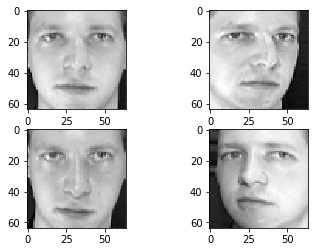

In [0]:
# @this code showcases matplotlib subplots. The syntax is: plt.subplot(height, width, index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# Face reconstruction problem

Let's solve the face reconstruction problem: given left halves of facex __(X)__, our algorithm shall predict the right half __(y)__. Our first step is to slice the photos into X and y using slices.

__Slices in numpy:__
* In regular python, slice looks roughly like this: `a[2:5]` _(select elements from 2 to 5)_
* Numpy allows you to slice N-dimensional arrays along each dimension: [image_index, height, width]
  * `data[:10]` - Select first 10 images
  * `data[:, :10]` - For all images, select a horizontal stripe 10 pixels high at the top of the image
  * `data[10:20, :, -25:-15]` - Take images [10, 11, ..., 19], for each image select a _vetrical stripe_ of width 10 pixels, 15 pixels away from the _right_ side.

__Your task:__

Let's use slices to select all __left image halves as X__ and all __right halves as y__.

In [0]:
data.shape

(400, 64, 64)

In [0]:
# select left half of each face as X, right half as Y
X = data[:,:,:32]
y = data[:,:,32:]

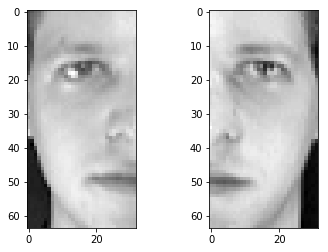

In [0]:
# If you did everything right, you're gonna see left half-image and right half-image drawn separately in natural order
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Please slice exactly the left half-face to X and right half-face to Y"

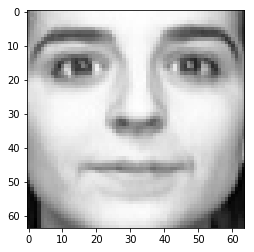

In [0]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1,64,32])
    right_half = right_half.reshape([-1,64,32])
    return np.concatenate([left_half,right_half],axis=-1)


# if you did everything right, you're gonna see a valid face
plt.imshow(glue(X,y)[99],cmap='gray')

# Machine learning stuff

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.reshape([len(X),-1]),
                                                 y.reshape([len(y),-1]),
                                                 test_size=0.05,random_state=42)

print(X_test.shape)

(20, 2048)


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

measure mean squared error

In [0]:
from sklearn.metrics import mean_squared_error

print("Train MSE:", mean_squared_error(Y_train,model.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test,model.predict(X_test)))

Train MSE: 3.23769e-12
Test MSE: 0.0102840215


## Why train error is much smaller than test?

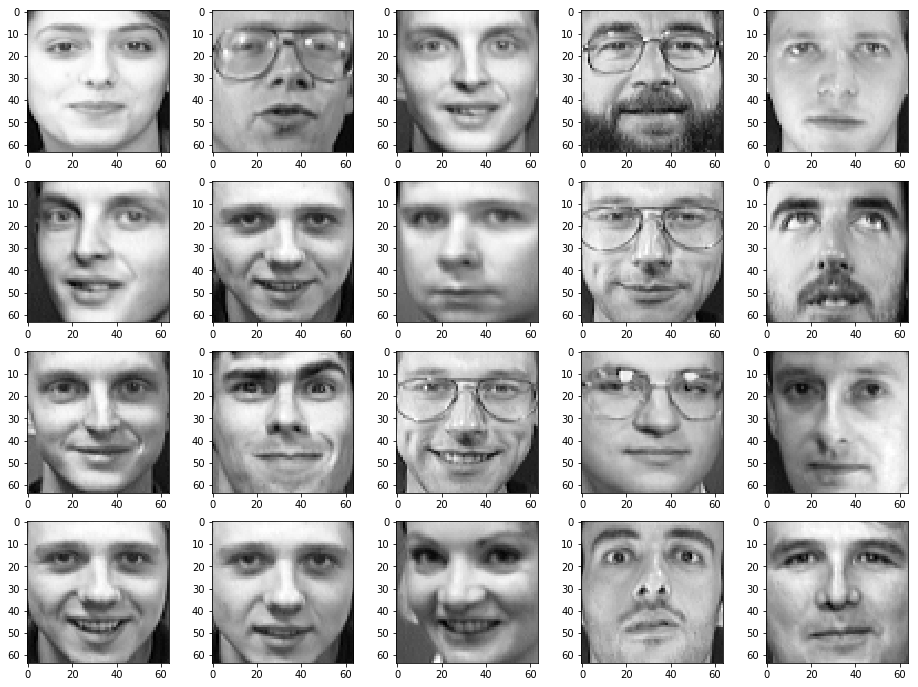

In [0]:
# Train predictions
pics = glue(X_train,model.predict(X_train))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

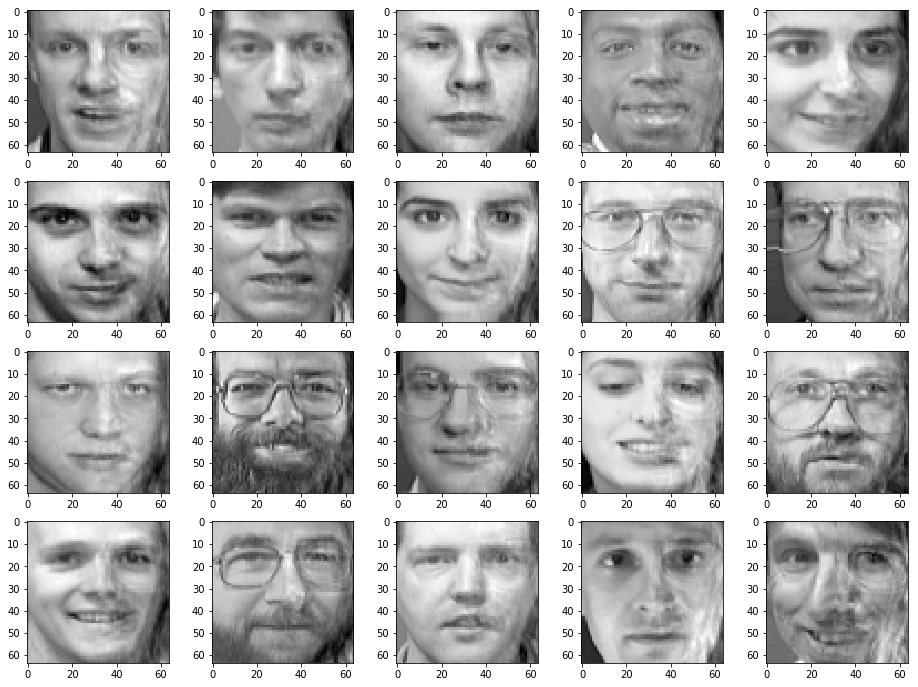

In [0]:
# Test predictions
pics = glue(X_test,model.predict(X_test))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

Remember regularisation? That is exactly what we need. There are many many linear models in sklearn package, and all of them can be found [here](https://scikit-learn.org/stable/modules/linear_model.html). We will focus on 3 of them Ridge regression, Lasso and ElasticNet.
Idea of all of them is very simple: Add some penalty to the objective loss function to prevent overfitting.

# Ridge regression
RidgeRegression is just a LinearRegression, with l2 regularization - penalized for $ \alpha \cdot \sum _i w_i^2$

Let's train such a model with alpha=0.5

In [0]:
from sklearn.linear_model import Ridge
#<YOUR CODE: fit the model on training set>
ridge = Ridge(alpha=10)
ridge.fit(X_train, Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [0]:
print("Train MSE:", mean_squared_error(Y_train,ridge.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test,ridge.predict(X_test)))

Train MSE: 0.003446035
Test MSE: 0.0074274754


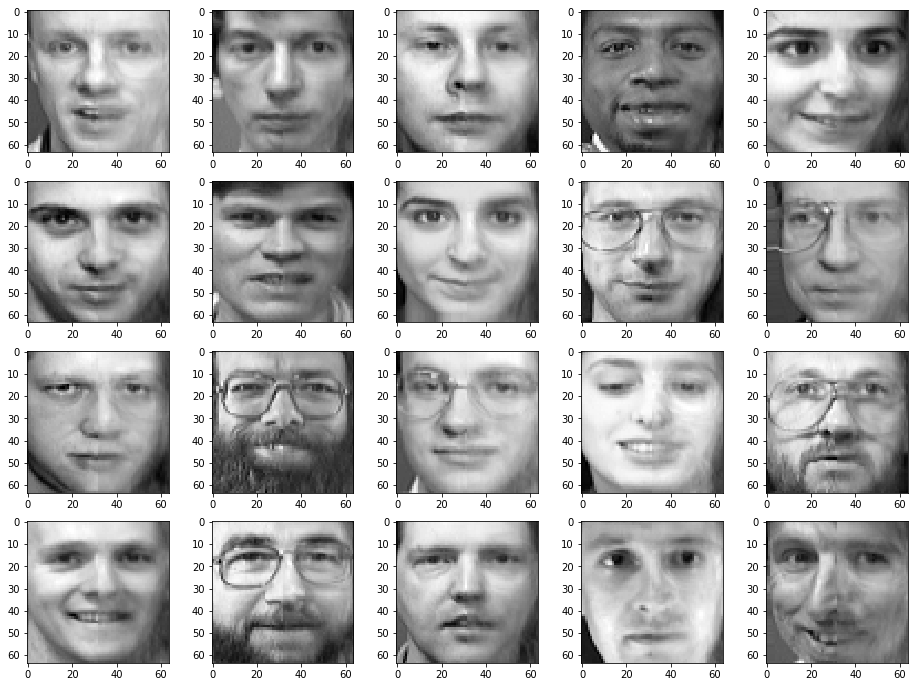

In [0]:
# Test predictions
pics = glue(X_test,ridge.predict(X_test))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# Grid search

Train model with diferent $\alpha$ and find one that has minimal test MSE.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def train_and_plot(models, parameter_dict):
    """This function takes a list of models and parameters
    dict as input and plots a graph of MSE loss VS parameter value"""
    for model in models: 
        #<YOUR CODE>
        # use GridSearchCV with neg_mean_squared_error scoring function
        gs = GridSearchCV(model, parameter_dict, scoring='neg_mean_squared_error', cv=3)
        cv_result = gs.fit(X_train, Y_train)
        # and 3 cross-validation folds to do grid search
        #<YOUR CODE>
        plt.errorbar(cv_result.cv_results_['param_alpha'],
                     cv_result.cv_results_['mean_test_score'],
                     cv_result.cv_results_['std_test_score'],
                     ecolor='g',
                     capsize=5, label=model.__str__().split("(")[0])
        plt.xscale("log", nonposx='clip')
        plt.xlabel("alpha")
        plt.ylabel("neg_MSE")
        plt.grid()
        plt.legend()

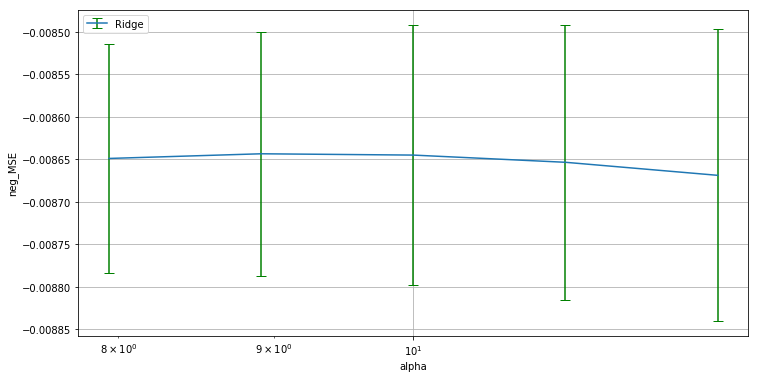

In [0]:
plt.figure(figsize=(12,6))

models = [Ridge()]
parameter_dict = {'alpha' : np.logspace(0.9, 1.1, 5)}

train_and_plot(models, parameter_dict)

In [0]:
np.logspace(-1, 3, 9)

array([1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])

In [0]:
from sklearn.linear_model import Lasso, ElasticNet

In [0]:
# Try playing with Lasso and/or ElasticNet to get better results
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print("Train MSE:", mean_squared_error(Y_train,lasso.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test,lasso.predict(X_test)))

Train MSE: 0.016459886
Test MSE: 0.020553974


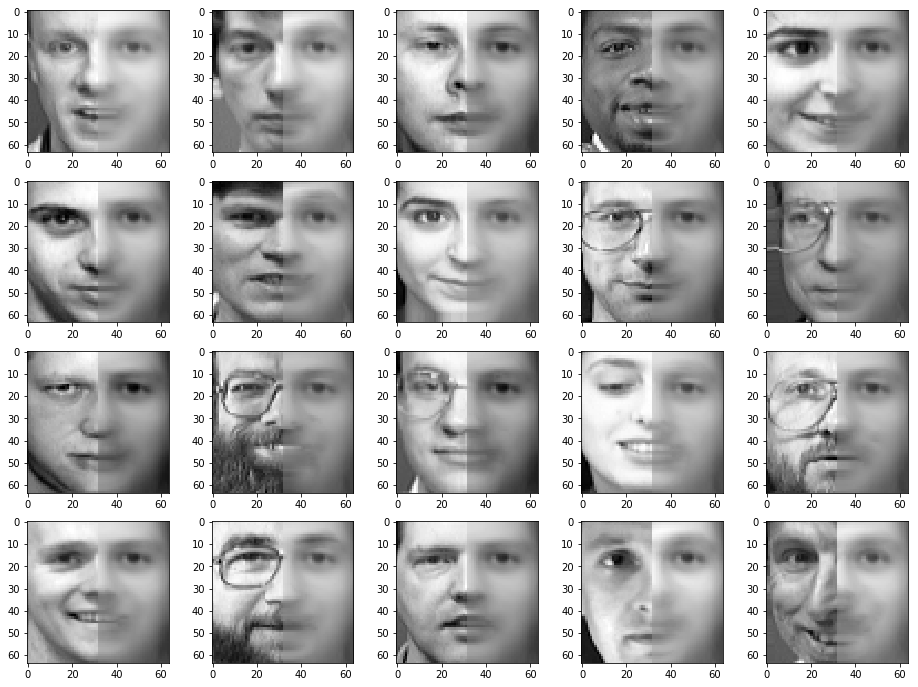

In [0]:
# Test predictions
pics = glue(X_test,lasso.predict(X_test))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# outliers impact on regression

Remember, that when we minimise loss
$$
MSE = (\hat y - y)^2
$$

which penalise more to for heigher values of error. What is that impact of this for the dataset with outliers, what do you think?

Here is an example of regression fitted with ordinary LR and RANSAC, which iteratively trains on random subsample of data, trying to identify outliers.

In [0]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


In [0]:
l1_model = linear_model.SGDRegressor(loss='epsilon_insensitive', epsilon=0.)
l1_model.fit(X, y)
print(l1_model.coef_)
line_y_l1 = l1_model.predict(line_X)

[79.45954427]


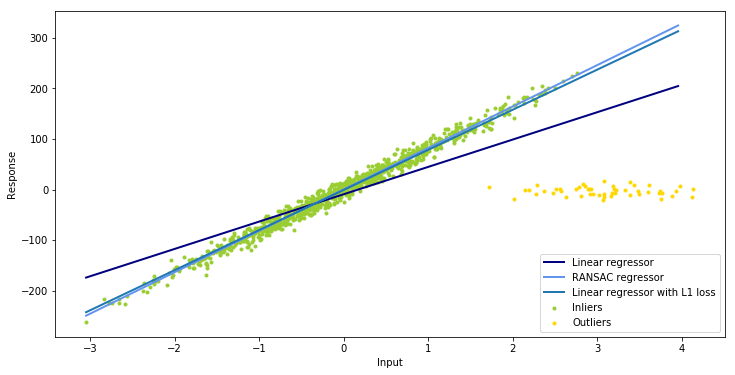

In [0]:
plt.figure(figsize=(12,6))
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.plot(line_X, line_y_l1, linewidth=lw, label='Linear regressor with L1 loss')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()